<a href="https://colab.research.google.com/github/fenix800/pdi-trabajo-final/blob/main/notebooks/Red_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

from skimage.transform import resize

**Cargar y preparar MNIST**

In [ ]:
# Cargamos MNIST
(X_mnist, y_mnist), (X_mnist_test, y_mnist_test) = mnist.load_data()

# Normalizamos
X_mnist = X_mnist / 255.0
X_mnist_test = X_mnist_test / 255.0

# Añadimos canal (28,28,1)
X_mnist = X_mnist[..., None]
X_mnist_test = X_mnist_test[..., None]

print(X_mnist.shape, y_mnist.shape)
print(X_mnist_test.shape, y_mnist_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
size = (28, 28)

model_mnist = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(*size, 1)),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   # 10 dígitos (0–9)
])

model_mnist.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
bs = 128
lr = 0.001

optimizer_mnist = SGD(learning_rate=lr)
model_mnist.compile(optimizer=optimizer_mnist,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

log_mnist = model_mnist.fit(
    X_mnist, y_mnist,
    batch_size=bs,
    epochs=100,                       # no hace falta mucho para el TP
    validation_data=(X_mnist_test, y_mnist_test)
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9258 - loss: 0.2518 - val_accuracy: 0.9334 - val_loss: 0.2292
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9309 - loss: 0.2367 - val_accuracy: 0.9352 - val_loss: 0.2174
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9326 - loss: 0.2245 - val_accuracy: 0.9379 - val_loss: 0.2071
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9372 - loss: 0.2153 - val_accuracy: 0.9430 - val_loss: 0.1957
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9397 - loss: 0.1996 - val_accuracy: 0.9438 - val_loss: 0.1878
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9426 - loss: 0.1944 - val_accuracy: 0.9457 - val_loss: 0.1809
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9469 - loss: 0.1809 - val_accuracy: 0.9490 - val_loss: 0.1690
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9472 - loss: 0.1783 - val_accu

**Congelar capas y crear modelo A con 3 salidas**

In [ ]:
# Congelamos todas las capas menos la última
for layer in model_mnist.layers[:-1]:
    layer.trainable = False

# Creamos un modelo base sin la última capa (Dense(10))
base_model = Sequential()
for layer in model_mnist.layers[:-1]:
    base_model.add(layer)

# Ahora añadimos una nueva capa final para 3 clases
model_A = Sequential([
    base_model,
    Dense(3, activation='softmax')   # estrella, corazon, rombo
])

model_A.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128)            │       240,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,643 (940.01 KB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 240,256 (938.50 KB)

**Cargar dataset (X.npy, y.npy)**

In [ ]:
!gdown 1yge7wZWm8LDdt64OsvL6bX0v5Ze5OonS
!gdown 119oo6Tmt1qwcN__Gj6ea0KJeHwY_oVE7

Downloading...
From: https://drive.google.com/uc?id=1yge7wZWm8LDdt64OsvL6bX0v5Ze5OonS
To: /content/X.npy
100% 20.9M/20.9M [00:00<00:00, 56.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=119oo6Tmt1qwcN__Gj6ea0KJeHwY_oVE7
To: /content/y.npy
100% 16.8k/16.8k [00:00<00:00, 57.6MB/s]


In [ ]:

# Cargamos
X_raw = np.load('X.npy')   # (522, 40000)
X_raw = X_raw / 255.0
y = np.load('y.npy')       # (522,)

print(X_raw.shape, y.shape)

# Reconstruimos imagen 200x200 y la reducimos a 28x28
X = []
size = (28, 28)

for x in X_raw:
    x_img = x.reshape(200, 200)           # de vector a imagen grande
    X.append(resize(x_img, size))

X = np.array(X)
print(X.shape)   # (522, 28, 28)

# Añadimos canal
X = X[..., None]  # (522, 28, 28, 1)
print(X.shape)

(522, 40000) (522,)
(522, 28, 28)
(522, 28, 28, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(417, 28, 28, 1) (417,)
(105, 28, 28, 1) (105,)


In [ ]:
# Convertimos las etiquetas de texto a números (igual estilo al profe)

# Orden de las clases (puedes mantener este orden en todo el notebook)
class_mapping = {
    'corazon': 1,
    'estrella': 0,
    'rombo': 2
}


y_train = np.array([class_mapping[label] for label in y_train])
y_test  = np.array([class_mapping[label] for label in y_test])

# Nos aseguramos de que sean enteros
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("y_train (primeros 10):", y_train[:10], "dtype:", y_train.dtype)
print("y_test  (primeros 10):", y_test[:10],  "dtype:", y_test.dtype)

y_train (primeros 10): [0 2 1 1 1 1 1 0 2 1] dtype: int64
y_test  (primeros 10): [1 0 0 1 0 2 0 1 2 1] dtype: int64


In [ ]:
bs = 16
lr = 0.0005   # un learning rate pequeño

optimizer_A = SGD(learning_rate=lr)
model_A.compile(optimizer=optimizer_A,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

log_A = model_A.fit(
    X_train, y_train,
    batch_size=bs,
    epochs=40,                     # puedes ajustar
    validation_data=(X_test, y_test)
)

Epoch 1/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3641 - loss: 1.8475 - val_accuracy: 0.4286 - val_loss: 1.1479
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4849 - loss: 1.0347 - val_accuracy: 0.5905 - val_loss: 0.9788
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5626 - loss: 0.9574 - val_accuracy: 0.6095 - val_loss: 0.9409
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5724 - loss: 0.9204 - val_accuracy: 0.5333 - val_loss: 0.9124
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5990 - loss: 0.8971 - val_accuracy: 0.5429 - val_loss: 0.8860
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6182 - loss: 0.8860 - val_accuracy: 0.7333 - val_loss: 0.8595
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6784 - loss: 0.8352 - val_accuracy: 0.7619 - val_loss: 0.8340
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7041 - loss: 0.8171 - val_accuracy: 0.7429 - val_loss

In [ ]:
loss_A, acc_A = model_A.evaluate(X_test, y_test, verbose=0)
print("Red A - loss:", loss_A)
print("Red A - accuracy:", acc_A)


Red A - loss: 0.40513765811920166
Red A - accuracy: 0.961904764175415


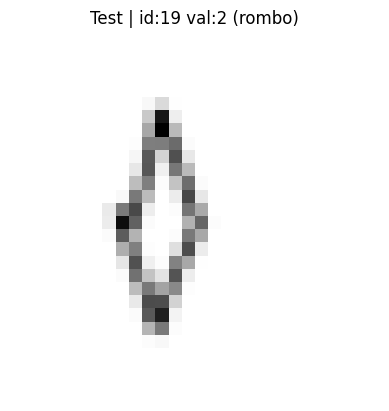

In [ ]:
etiqueta_a_figura = {0: 'corazon', 1: 'estrella', 2: 'rombo'}

idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_figura = etiqueta_a_figura[label]

plt.title("Test | id:{} val:{} ({})".format(idx, label, nombre_figura))
plt.axis('off')
plt.imshow(-im[:, :, 0], cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


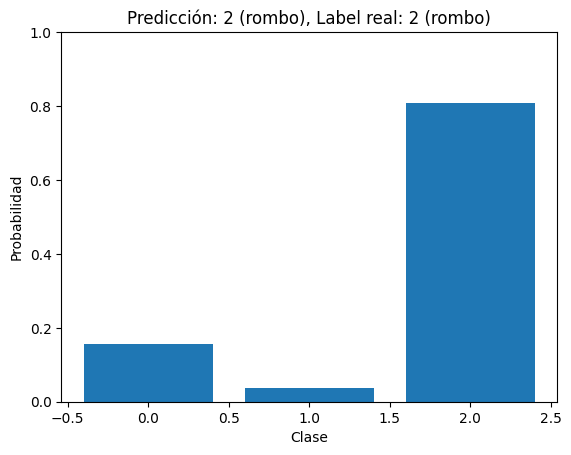

In [ ]:
salida = model_A.predict(im[None, :, :, :])[0]

etiqueta_map = {0: 'corazon', 1: 'estrella', 2: 'rombo'}
nombre_pred = etiqueta_map[salida.argmax()]
nombre_real = etiqueta_map[label]

plt.figure()
plt.title("Predicción: {} ({}), Label real: {} ({})".format(
    salida.argmax(), nombre_pred, label, nombre_real))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


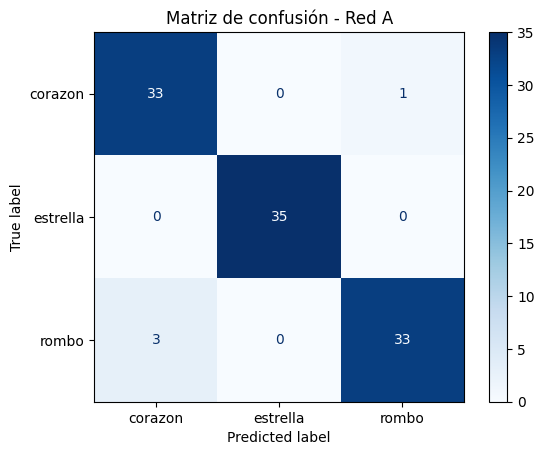

In [ ]:
y_pred_A = model_A.predict(X_test).argmax(axis=1)
cm_A = confusion_matrix(y_test, y_pred_A)

disp = ConfusionMatrixDisplay(cm_A, display_labels=['corazon', 'estrella', 'rombo'])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión - Red A")
plt.show()

In [ ]:
model_A.save("modelo_redA.h5")